SIMLR Testing
---

In [13]:
import sys
sys.path.append('../')
from fcc_DRs import *

In [14]:
# read in counts datasets
retina = RNA_counts.from_file(datafile='../inputs/GSM1626793_P14Retina_1.processed.tsv')
colon = RNA_counts.from_file(datafile='../inputs/GSM2743164_rep1_colon_rnaseq.preprocessed.tsv')

### SIMLR

---
First, read in the `F` construct that consists of a c-dimensional output of length `n_cells`, where c is the number of expected clusters passed to SIMLR.  
  
Here, c was estimated using the `SIMLR_Estimate_Number_of_Clusters` function from the SIMLR package.

In [31]:
latent = pd.read_csv('Rmethods_out/colon_SIMLR_F.csv')
latent = np.array(latent)
latent = latent.copy(order='C')

In [32]:
colon_SIMLR_results = DR(matrix=latent)
colon_SIMLR_results.results = latent
colon_SIMLR_results.clu = Cluster(latent.astype('double'), autoplot=False)
colon_SIMLR_results.name = 'SIMLR'

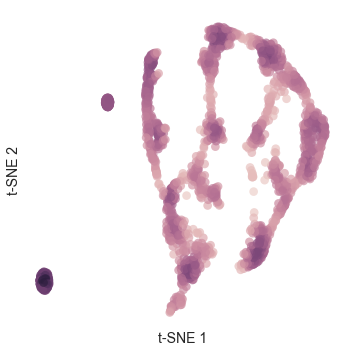

CPU times: user 14.3 s, sys: 534 ms, total: 14.9 s
Wall time: 15.2 s


In [33]:
%%time
colon_SIMLR_tSNE = fcc_tSNE(matrix=latent, perplexity=100, seed=18)
colon_SIMLR_tSNE.plot()

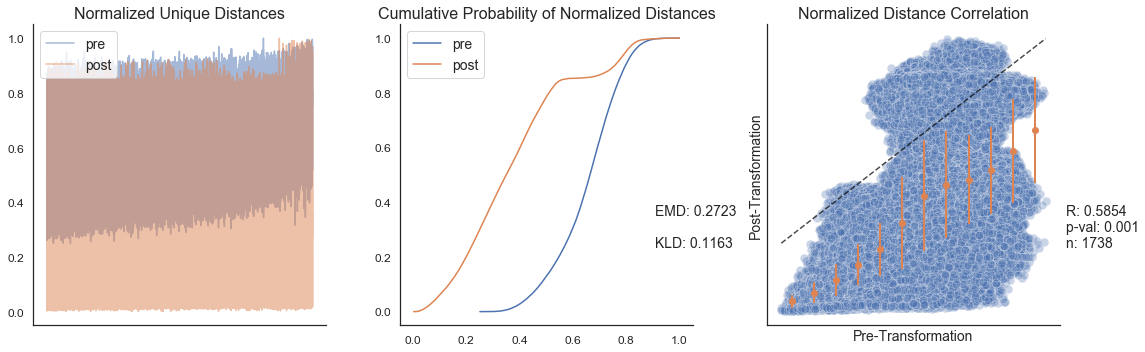

Knn Preservation: 97.8713

CPU times: user 1min 48s, sys: 13.6 s, total: 2min 2s
Wall time: 2min 5s


In [34]:
%%time

k=30
# look at SIMLR vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=colon.distance_matrix(transform='arcsinh'), 
                                  post=colon_SIMLR_results.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=colon.knn_graph(k, transform='arcsinh'), 
                                                       post=colon_SIMLR_results.knn_graph(k))))

---
Now read in the 2D `$ydata` construct and see if that's a lot different from the c-dimensional output (where c is the number of expected clusters passed to SIMLR)

In [35]:
latent = pd.read_csv('Rmethods_out/colon_SIMLR_ydata.csv')
latent = np.array(latent)
latent = latent.copy(order='C')

In [36]:
colon_SIMLR_results = DR(matrix=latent)
colon_SIMLR_results.results = latent
colon_SIMLR_results.clu = Cluster(latent.astype('double'), autoplot=False)
colon_SIMLR_results.name = 'SIMLR'

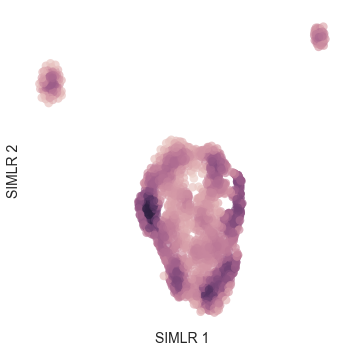

In [37]:
colon_SIMLR_results.plot()

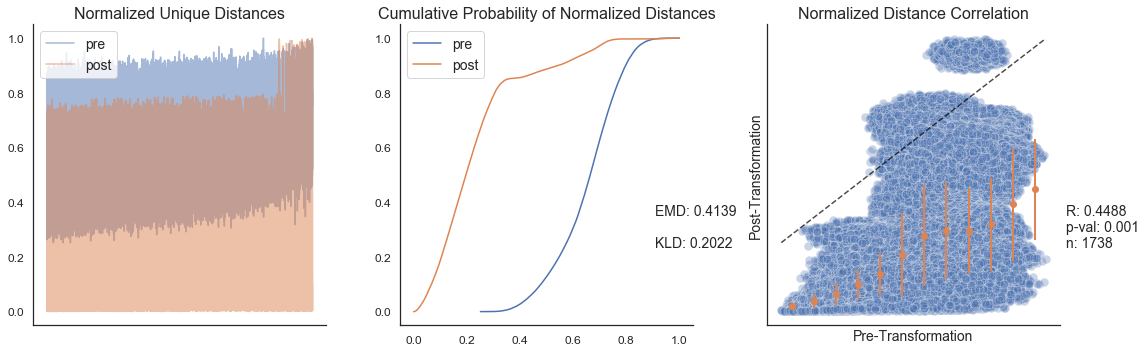

Knn Preservation: 97.8453

CPU times: user 1min 50s, sys: 14.3 s, total: 2min 4s
Wall time: 2min 11s


In [38]:
%%time

k=30
# look at SIMLR vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=colon.distance_matrix(transform='arcsinh'), 
                                  post=colon_SIMLR_results.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=colon.knn_graph(k, transform='arcsinh'), 
                                                       post=colon_SIMLR_results.knn_graph(k))))

---
Perform same analysis on retina dataset

In [39]:
latent = pd.read_csv('Rmethods_out/retina_SIMLR_F.csv')
latent = np.array(latent)
latent = latent.copy(order='C')

In [40]:
retina_SIMLR_results = DR(matrix=latent)
retina_SIMLR_results.results = latent
retina_SIMLR_results.clu = Cluster(latent.astype('double'), autoplot=False)
retina_SIMLR_results.name = 'SIMLR'

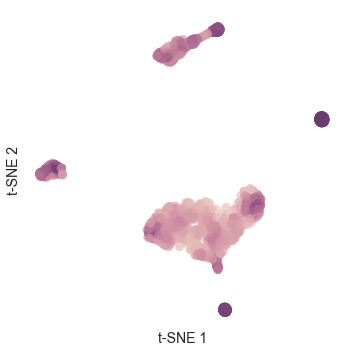

CPU times: user 11.1 s, sys: 472 ms, total: 11.6 s
Wall time: 11.5 s


In [41]:
%%time
retina_SIMLR_tSNE = fcc_tSNE(matrix=latent, perplexity=100, seed=18)
retina_SIMLR_tSNE.plot()

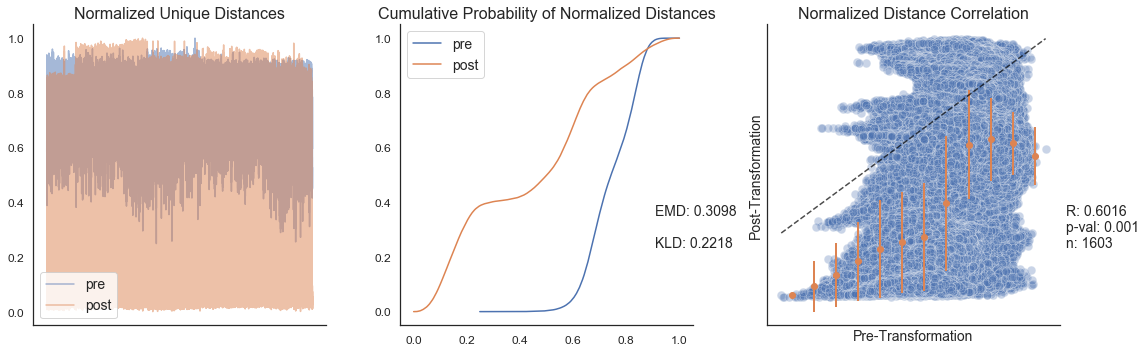

Knn Preservation: 97.3331

CPU times: user 1min 26s, sys: 7.1 s, total: 1min 33s
Wall time: 1min 33s


In [42]:
%%time

k=30
# look at SIMLR vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=retina.distance_matrix(transform='arcsinh'), 
                                  post=retina_SIMLR_results.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=retina.knn_graph(k, transform='arcsinh'), 
                                                       post=retina_SIMLR_results.knn_graph(k))))

---
Now read in the 2D `$ydata` construct and see if that's a lot different from the c-dimensional output (where c is the number of expected clusters passed to SIMLR)

In [47]:
latent = pd.read_csv('Rmethods_out/retina_SIMLR_ydata.csv')
latent = np.array(latent)
latent = latent.copy(order='C')

In [48]:
retina_SIMLR_results = DR(matrix=latent)
retina_SIMLR_results.results = latent
retina_SIMLR_results.clu = Cluster(latent.astype('double'), autoplot=False)
retina_SIMLR_results.name = 'SIMLR'

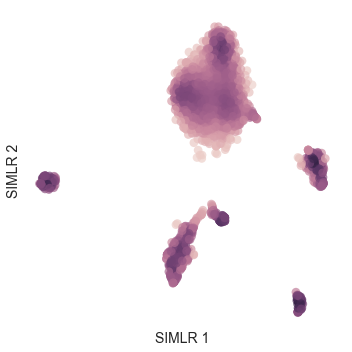

In [49]:
retina_SIMLR_results.plot()

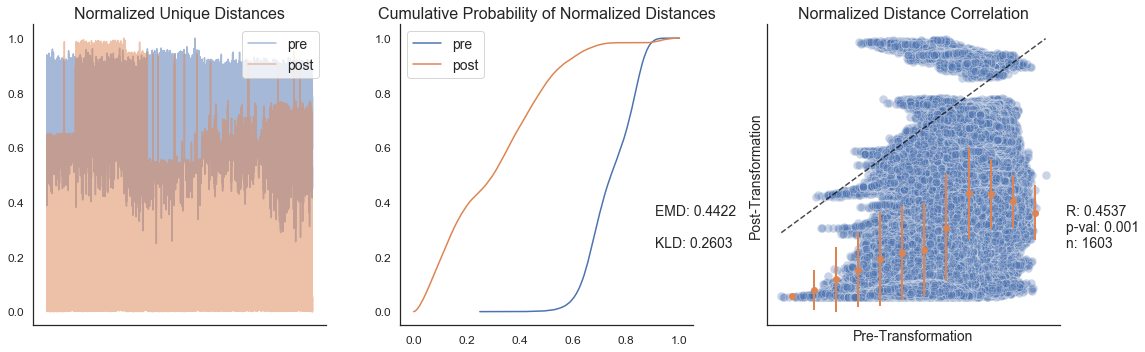

Knn Preservation: 97.2987

CPU times: user 1min 26s, sys: 9.71 s, total: 1min 36s
Wall time: 1min 36s


In [50]:
%%time

k=30
# look at SIMLR vs 500-feature dataset 
# transform==arcsinh for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=retina.distance_matrix(transform='arcsinh'), 
                                  post=retina_SIMLR_results.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=retina.knn_graph(k, transform='arcsinh'), 
                                                       post=retina_SIMLR_results.knn_graph(k))))

### GLM-PCA

---

In [15]:
latent = pd.read_csv('Rmethods_out/colon_GLM-PCA.csv')
latent = np.array(latent)
latent = latent.copy(order='C')

In [16]:
colon_GLMPCA_results = DR(matrix=latent)
colon_GLMPCA_results.results = latent
colon_GLMPCA_results.clu = Cluster(latent.astype('double'), autoplot=False)
colon_GLMPCA_results.name = 'GLM-PCA'

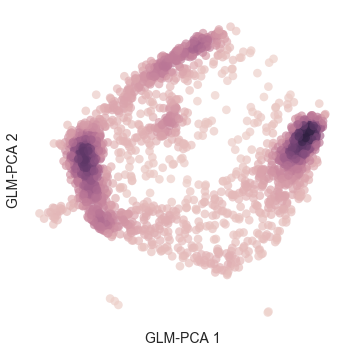

In [17]:
colon_GLMPCA_results.plot()

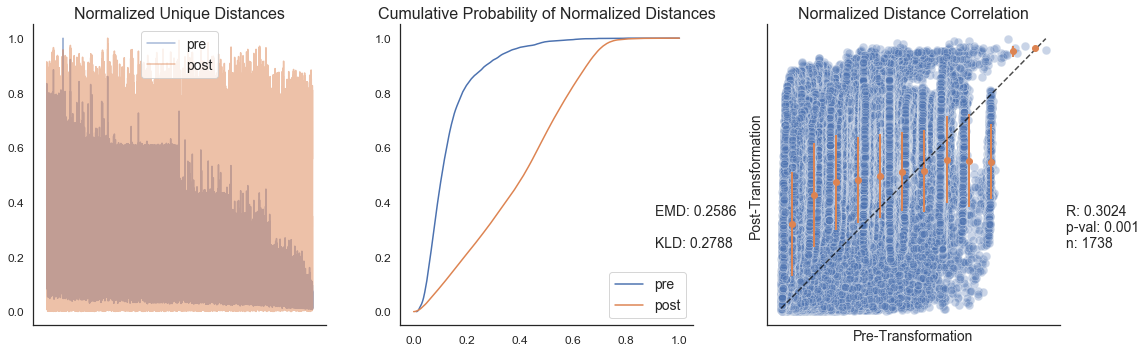

Knn Preservation: 97.1596

CPU times: user 2min 22s, sys: 14 s, total: 2min 36s
Wall time: 2min 43s


In [18]:
%%time

k=30
# look at GLM-PCA vs 500-feature dataset 
# transform==None for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=colon.distance_matrix(transform=None), 
                                  post=colon_GLMPCA_results.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=colon.knn_graph(k, transform=None), 
                                                       post=colon_GLMPCA_results.knn_graph(k))))

---
Perform same analysis on retina dataset

In [19]:
latent = pd.read_csv('Rmethods_out/retina_GLM-PCA.csv')
latent = np.array(latent)
latent = latent.copy(order='C')

In [20]:
retina_GLMPCA_results = DR(matrix=latent)
retina_GLMPCA_results.results = latent
retina_GLMPCA_results.clu = Cluster(latent.astype('double'), autoplot=False)
retina_GLMPCA_results.name = 'GLM-PCA'

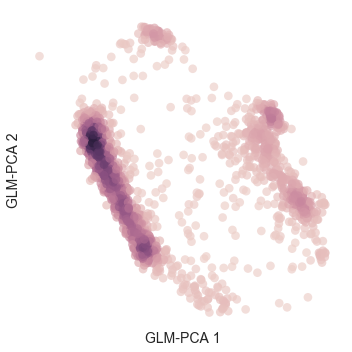

In [21]:
retina_GLMPCA_results.plot()

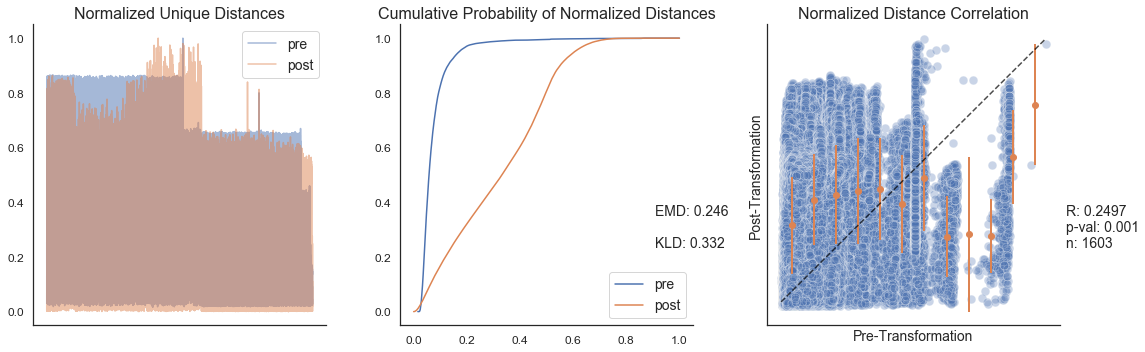

Knn Preservation: 96.6568

CPU times: user 1min 51s, sys: 13.6 s, total: 2min 5s
Wall time: 2min 15s


In [22]:
%%time

k=30
# look at GLM-PCA vs 500-feature dataset 
# transform==None for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=retina.distance_matrix(transform=None), 
                                  post=retina_GLMPCA_results.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=retina.knn_graph(k, transform=None), 
                                                       post=retina_GLMPCA_results.knn_graph(k))))

---
# ZINB-WAVE

In [23]:
latent = pd.read_csv('Rmethods_out/colon_ZINB-WAVE.csv')
latent = np.array(latent)
latent = latent.copy(order='C')

In [24]:
colon_ZINBWAVE_results = DR(matrix=latent)
colon_ZINBWAVE_results.results = latent
colon_ZINBWAVE_results.clu = Cluster(latent.astype('double'), autoplot=False)
colon_ZINBWAVE_results.name = 'ZINB-WAVE'

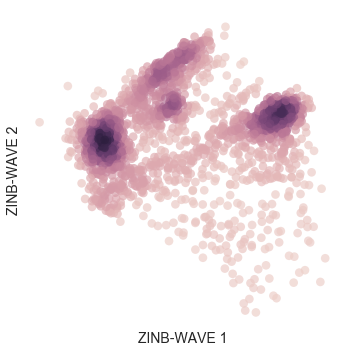

In [25]:
colon_ZINBWAVE_results.plot()

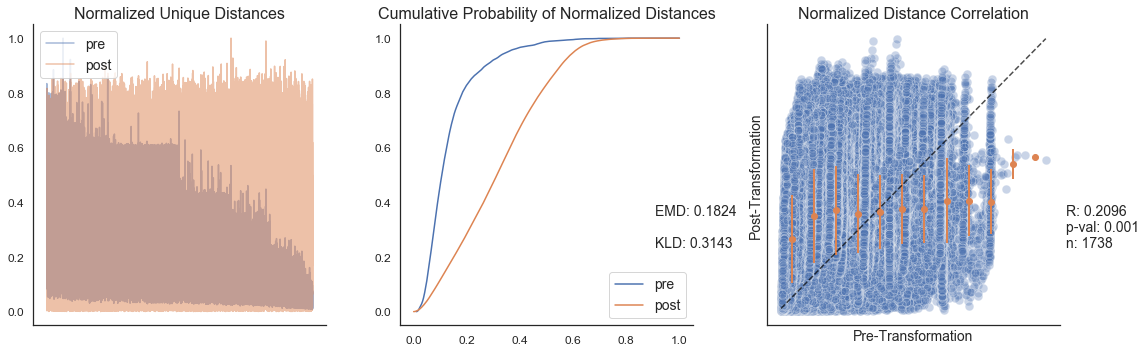

Knn Preservation: 97.1428

CPU times: user 1min 48s, sys: 15.4 s, total: 2min 4s
Wall time: 2min 7s


In [26]:
%%time

k=30
# look at ZINB-WAVE vs 500-feature dataset 
# transform==None for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=colon.distance_matrix(transform=None), 
                                  post=colon_ZINBWAVE_results.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=colon.knn_graph(k, transform=None), 
                                                       post=colon_ZINBWAVE_results.knn_graph(k))))

---
### Discrete Retina Dataset
Perform same analysis on retina dataset

In [27]:
latent = pd.read_csv('Rmethods_out/retina_ZINB-WAVE.csv')
latent = np.array(latent)
latent = latent.copy(order='C')

In [28]:
retina_ZINBWAVE_results = DR(matrix=latent)
retina_ZINBWAVE_results.results = latent
retina_ZINBWAVE_results.clu = Cluster(latent.astype('double'), autoplot=False)
retina_ZINBWAVE_results.name = 'ZINB-WAVE'

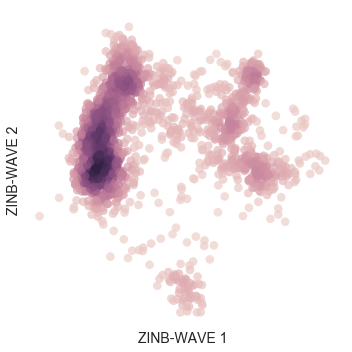

In [29]:
retina_ZINBWAVE_results.plot()

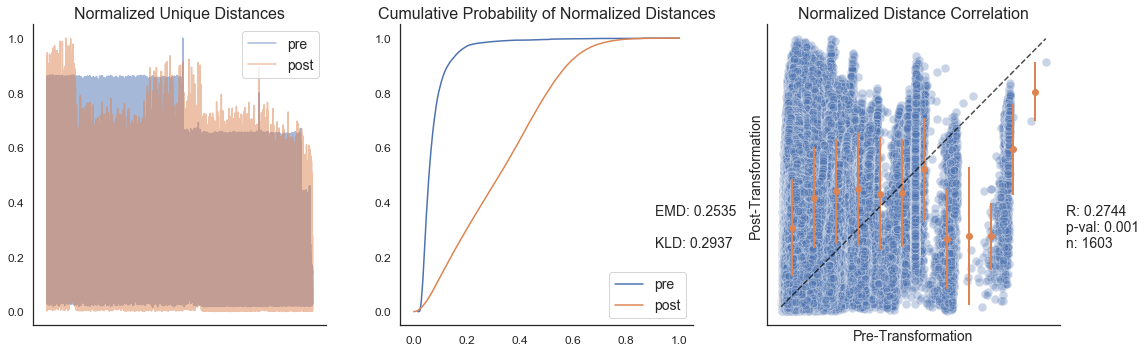

Knn Preservation: 96.7123

CPU times: user 1min 36s, sys: 15.1 s, total: 1min 51s
Wall time: 2min 7s


In [30]:
%%time

k=30
# look at GLM-PCA vs 500-feature dataset 
# transform==None for distance matrix here bc that's the input
mantel, EMD, KLD = compare_euclid(pre=retina.distance_matrix(transform=None), 
                                  post=retina_ZINBWAVE_results.distance_matrix())
print('Knn Preservation: {}\n'.format(knn_preservation(pre=retina.knn_graph(k, transform=None), 
                                                       post=retina_ZINBWAVE_results.knn_graph(k))))